# Feature Selection Visually Explained on Titanic 🎯
My Kaggle Top 5% Titanic machine learning series:
- [Decision Tree Overfitting Visualized](https://www.youtube.com/watch?v=offRb9fBOuw&t=29s)
- [Grid Search with Random Forest (Top 6% Kaggle Score)](https://www.youtube.com/watch?v=yVul279EMlA&t=45s)
- [Why your model looks perfect.. then fails: Random Forest vs Decision Tree](https://www.youtube.com/watch?v=m4YGczrVueI&t=4s) 
- [Cross-Validation Explained Visually ](https://www.youtube.com/watch?v=Pt14X7j-sbY&t=4s)

---
## 🔍 Feature Selection
Have you ever added more features to your model thinking,
"More info = better accuracy!"

But instead..
🎯 Your model starts overfitting or accuracy drops?
That’s where feature selection comes in.
Let’s break it down visually and practically using the Titanic dataset.
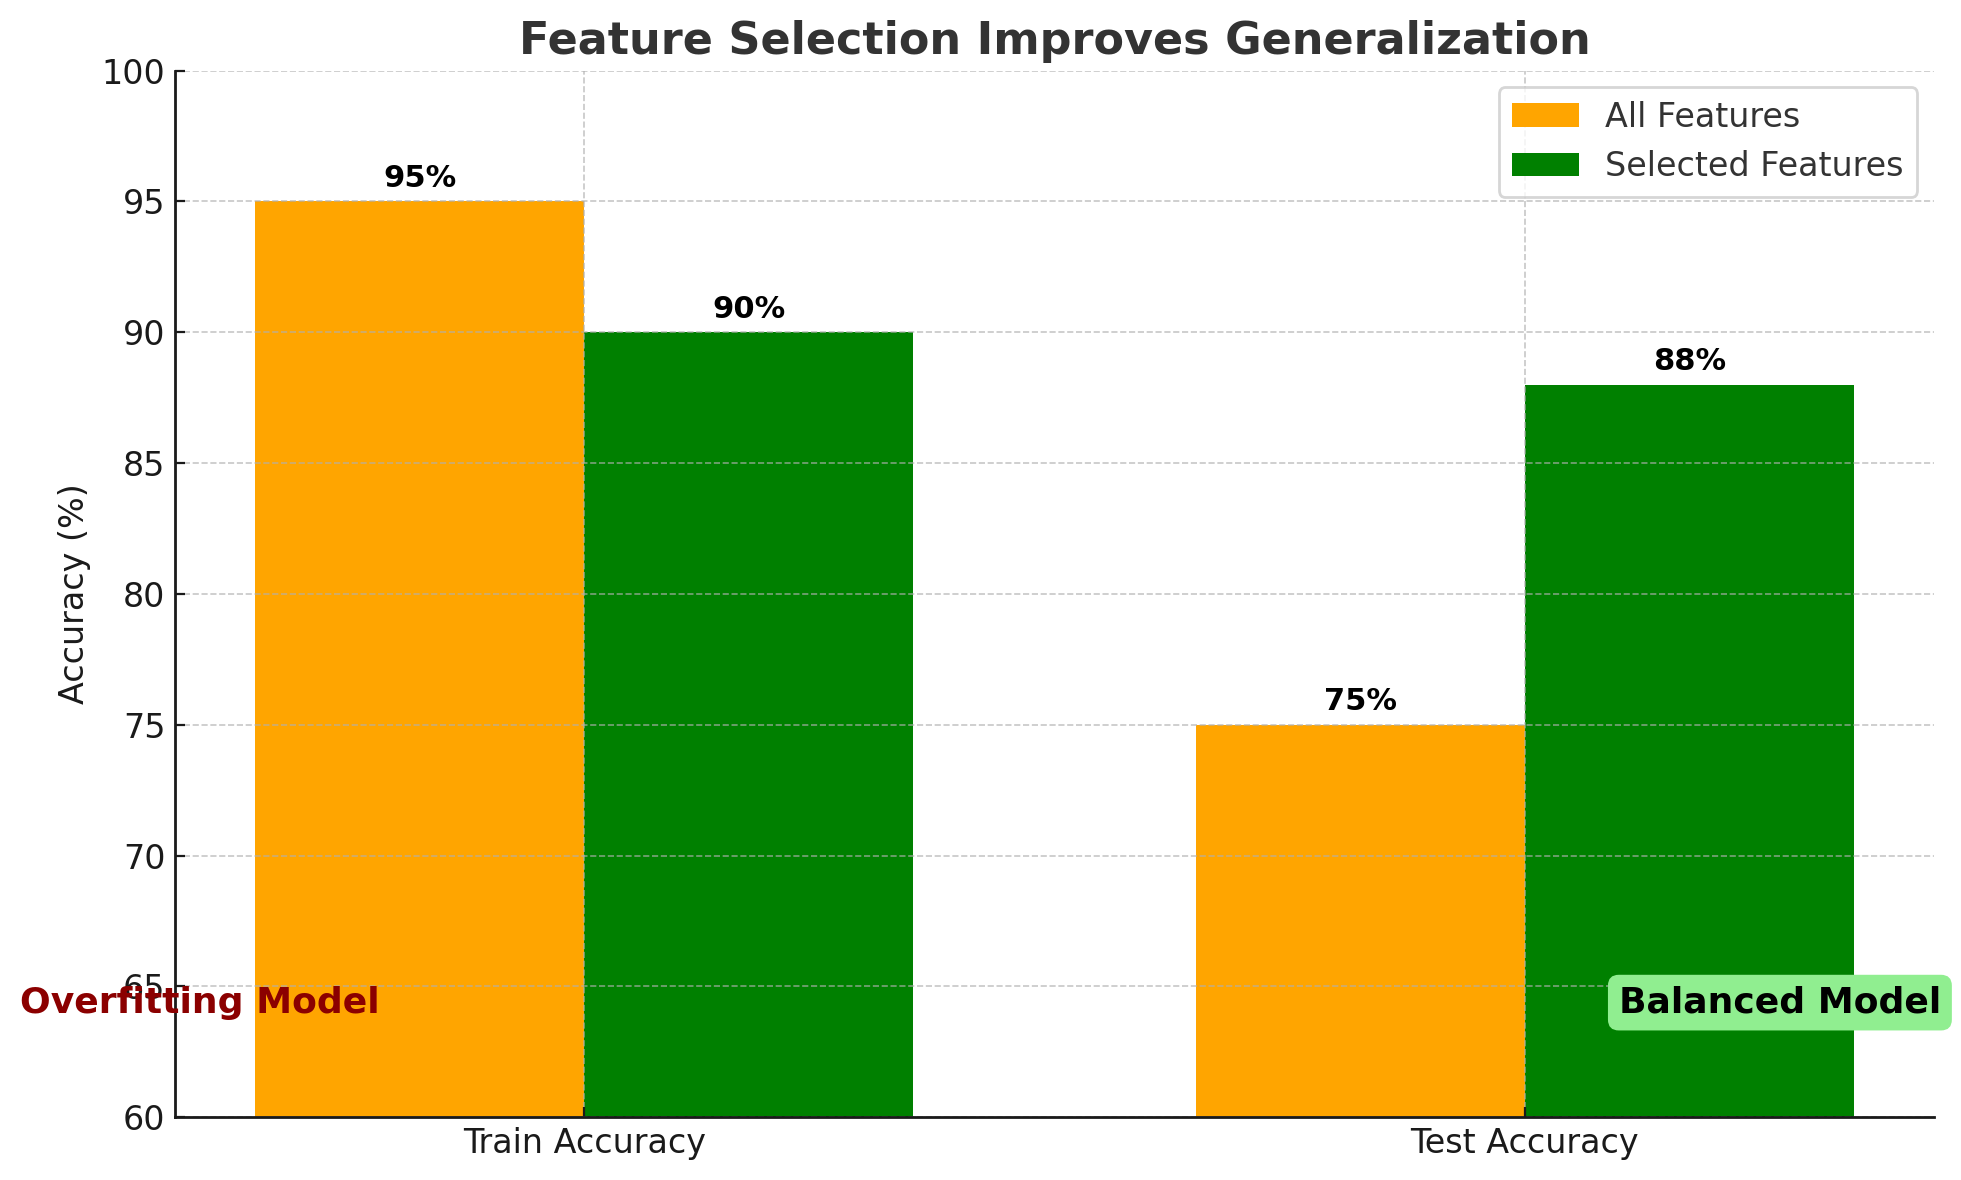

This chart shows how:
* The overfitted model has high training accuracy but poor test accuracy.
* The balanced model (with selected features) performs well on both.

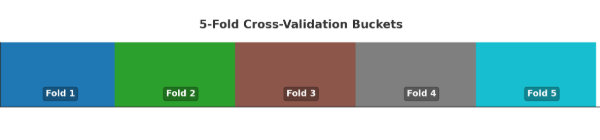

## 

# Train Data
Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and whether they survive or not. The shape of the train data is (891, 12). 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Check Duplicates and Missing Values

In [2]:
#Check Duplicates:
dupstr = df.duplicated()
print('Total no of duplicate values in Training Dataset = %d' % (dupstr.sum()))
#df[dupstr].head(10)

Total no of duplicate values in Training Dataset = 0


In [3]:
#search for columns with missing values:
def findNA():
    print("Missing data by column as a percent:")
    findNA=df.isnull().sum().sort_values(ascending=False)/len(df)
    print(findNA.head())
#findNA() 

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Feature Engineer
Must match columns for both the train and test dataset. Encode Categorical Variables is needed for this dataset since there are many important variables that are not numeric yet. There are three classes C, Q, and S. Class C seems to have the highest chance of survival. Class S has the lowest chance of survival. Unfornately this would tend to show that economic status seems to played a part in the decision if someone survived or not. Embarked does not play role major role in feature importance. 

In [5]:
# Fill missing Age and Fare values using the train set's median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

test_df['Age'] = test_df['Age'].fillna(df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(df['Fare'].median())

In [6]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [7]:
# Preprocessing:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
passID=test_df['PassengerId']

# Fill missing first
df['Embarked'] = df['Embarked'].fillna('S')  # 'S' is most common
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Map to numbers
test_df['Embarked'] = test_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Now select features (after filling)
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare','Embarked', 'FamilySize']]
test_df = test_df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]

df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,22.0,7.2500,0,2
1,1,1,1,38.0,71.2833,1,2
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,2
4,0,3,0,35.0,8.0500,0,1


# Step 2: Train models

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

#print("Cross-validation scores:", cv_scores)
print("Average CV accuracy:", round(cv_scores.mean(), 4))

Average CV accuracy: 0.8127


In [10]:
# Fit model (this is required)
model.fit(X_train, y_train)

# Now you can use the model
y_pred = model.predict(X_test)

# Accuracy
print("Random Forest Train Accuracy:", round(model.score(X_train, y_train), 3))
print("Random Forest Test Accuracy:", round(accuracy_score(y_test, y_pred), 3))

Random Forest Train Accuracy: 0.981
Random Forest Test Accuracy: 0.798


## Confusion Matrix
Males (Sex = 0) had a much lower survival rate than females (Sex = 1).
As we’ll see later in feature importance, gender is one of the most predictive features.

In [11]:
genderTable = pd.crosstab(df['Survived'],df['Sex'])
genderTable.columns = ['Male', 'Female']
genderTable.index = ['Did Not Survive', 'Survived']
gender_percent = genderTable.div(genderTable.sum(axis=1), axis=0).round(2)
gender_percent

,Male,Female
Did Not Survive,0.85,0.15
Survived,0.32,0.68


# Examine Target Variable
Survived is the Y variable we will be analyzing. Since the survival rete is 0.384 the data is not considered unbalanced. 

In [12]:
temp=df['Survived'].value_counts()
print(temp)
no=temp[0]
yes=temp[1]
percent=round(yes/(yes+no),3)
print("Percent that survived: ", percent)

0    549
1    342
Name: Survived, dtype: int64
Percent that survived:  0.384


# Numeric DataFrame
For now, we will analyze only numeric values. Categorical values will need to be encoded or analyzed individually.

In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df = df.select_dtypes(include=numerics)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,22.0,7.2500,0,2
1,1,1,1,38.0,71.2833,1,2
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,2
4,0,3,0,35.0,8.0500,0,1


# Check for missing values
Age is missing around 20% of values.Therefore, we can simply fill in the mean for that one column.

In [14]:
#search for columns with missing values:
def findNA():
    print("Missing data by column as a percent:")
    findNA=df.isnull().sum().sort_values(ascending=False)/len(df)
    print(findNA.head())
#findNA() 

In [15]:
df= df.fillna(df.mean())

# Split Data

In [16]:
X=df.drop('Survived', axis=1)
y=df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 42)

# Highly Correlated Features
There are no highly correlated variables above 80%. Therefore, we do not need to be concerned about removing variables that are too highly correlated. 

# Feature Selection

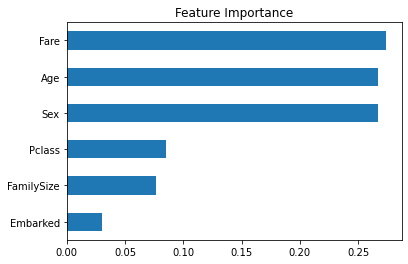

In [17]:
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()

This graph shows which features the model relied on most to make predictions. We can see that Fare, Age, and Sex were the most important, while things like Embarked mattered much less.

# Tunning Forest
Random forest AUC:  0.8503 which is good results considering forest does not overfit data.

In [18]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

#Check for Error and find Best n_estimators:
def forestNumEst():
    numbers= [2, 20, 40, 50, 60, 100]
    maeList=[] #error
    accList=[]
    
    for n in numbers:
        forest = RandomForestClassifier(n_estimators=n, oob_score = True)
        forest.fit(X_train, y_train)
        y_pred = forest.predict(X_test)
        mae=metrics.mean_absolute_error(y_test, y_pred).round(2)
        forest_auc = round( metrics.roc_auc_score(y_test, y_pred), 4 ) 
        #print("Random forest AUC: ", forest_auc) 
      
        accList.append(forest_auc)
        maeList.append(mae)
        
    plt.plot(numbers,accList)
    plt.title("Forest Estimators" )
    plt.xlabel("Estimators")
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show() 
    
    plt.plot(numbers, maeList)
    plt.title("Forest Estimators" )
    plt.xlabel("Estimators")
    plt.ylabel('error')
    plt.legend()
    plt.show() 
#forestNumEst() 

# GridSearch CV
GridSearchCV helps find the best combination of model parameters by testing all possible combinations from a grid you define. It trains the model multiple times using cross-validation and returns the settings that give the highest accuracy (or lowest error). This helps automate model tuning and improves performance by avoiding guesswork.

In [19]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

def runGridSearch():
    params = {
        'n_estimators':[50, 60],
        'max_depth':[6, 9, 12],
        'min_samples_split':[2, 3],  #2 is default
        'min_samples_leaf':[1, 3, 5]   #1 is default
        #'max_features':['auto', 'sqrt', 'log2'],
        #'criterion':['gini', 'entropy'],
    }
    
    #kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
    forestGrid=GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5, scoring='accuracy')
    forestGrid.fit(X_train, y_train)
    return forestGrid.best_params_
#runGridSearch()

#### Final Random Forest Prediction
* Top 5% Using {'max_depth': 5, 'n_estimators': 60} 0.79425
* {'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 50}

# Test Data

In [20]:
col_features=list(X.columns)
test_df=test_df[col_features]
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,34.5,7.8292,2,1
1,3,1,47.0,7.0000,0,2
2,2,0,62.0,9.6875,2,1
3,3,0,27.0,8.6625,0,1
4,3,1,22.0,12.2875,0,3


# Final Prediction

In [21]:
submit_model = RandomForestClassifier(
    n_estimators=50, 
    max_depth=6, 
    min_samples_leaf= 3,
 min_samples_split= 3,oob_score=True)
submit_model.fit(X_train, y_train)
y_pred = submit_model.predict(X_test)

In [22]:
test_predictions = model.predict(test_df)
tupleData = list(zip(passID, test_predictions))
output = pd.DataFrame(tupleData, columns = ['PassengerId', 'Survived'])
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [23]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [24]:
import os
print("Files in current directory:", os.listdir())

Files in current directory: ['submission.csv', '__notebook__.ipynb']
